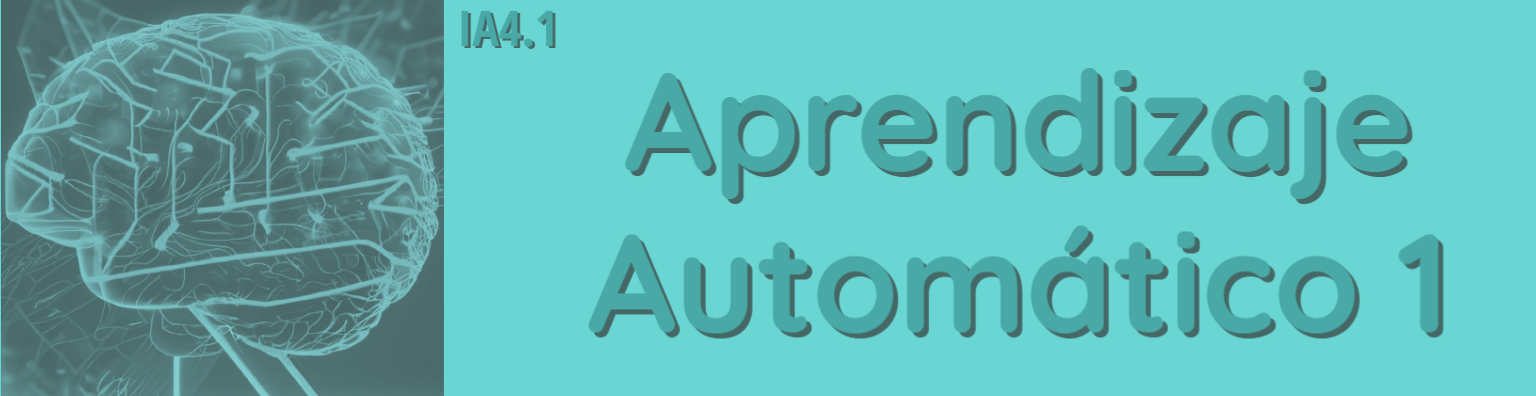

TRABAJO PRÁCTICO PREDICCIÓN DE LLUVIA EN AUSTRALIA

Estudiantes:

Alomar, Francisco J.
Perrone, Martín L.

In [1103]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import ElasticNet



# EXPLORACIÓN DE LOS DATOS



In [1104]:
#importamos el archivo y generamos el dataframe
df = pd.read_csv('weatherAUS.csv')
df_original = df

In [1105]:
#apreciamos el nombre de las columnas. El estilo es camel y consideramos que no hay problemas en cómo estan definidas (salvo la primera, que tratamos más adelante)
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [1106]:
#obsevamos los cinco primeros registros dataframe. Esto también devuelve la cantidad de columnas.
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [1107]:
#observamos los último 5 registros del df. Esto nos devuelve además el total de registros.
df.tail()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145411,145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [1108]:
#utilizamos el métod .describe() incluyendo a las variables categóricas para hacer una primera observación general de los datos
df.describe(include=['number', 'object'])

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,145412.000000,145412,145412,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135096,135159.000000,...,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142152,142153,142153.000000
unique,NaN,3435,49,NaN,NaN,NaN,NaN,NaN,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,2013-11-11,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
freq,NaN,49,3435,NaN,NaN,NaN,NaN,NaN,9910,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110276,110281,NaN
mean,72728.184393,NaN,NaN,12.195873,23.223176,2.361516,5.468616,7.611241,NaN,40.036564,...,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,NaN,NaN,2.361242
std,41990.722236,NaN,NaN,6.398018,7.118770,8.479338,4.193871,3.785612,NaN,13.607212,...,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,NaN,NaN,8.479084
min,0.000000,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN,0.000000
25%,36362.750000,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,NaN,0.000000
50%,72727.500000,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,NaN,0.000000
75%,109093.250000,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,NaN,0.800000


La primera columna del df "Unamed: 0", pareciera contener el número ordinal de cada registro observado. Consideramos que podemos prescindir de esta columna dado que ya tenemos los índices del df para identificar a cada registro. Por otra parte, hay un error en alguna parte de esta columna dado que el número final contenido en el último registro no coincide con el del índice. Por lo tanto, eliminamos la columna del df.

In [1109]:
df = df.drop('Unnamed: 0', axis=1)

In [1110]:
#Cantidad de valores faltantes.
df.isna().sum()

Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [1111]:
#Identificamos el tipo de dato de cada columna
df.dtypes

Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

Comenzamos con la columna "Date" que no tiene valores nulos. Se nos ocurre para esta columna pasarla a formato datetime porque podrá ser últil más adelante.

In [1112]:
#pasamos la columna Date a datetime
df['Date'] = pd.to_datetime(df['Date'])


# TRATAMIENTO DE VALORES NaN

In [1113]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

El resto de las columnas tienen de modo variable una catidad cosiderable de NaN. Las locaciones en cuestión son Sydney, Sydney Airport, Melbourne Airport, Melbourne y Canberra. Antes de disponernos a completar los valores faltantes de algún modo, consideramos pertinente averiguar las locaciones "cercanas" para las cuidades con cuyos datos construiremos el modelos, dado que estos datos "cercanos" podrían ayudarnos a completar algunos datos faltantes. Consideramos "cercanas" a las locaciones que estén a menos de 20 km una de otra, respecto de las que nos interesan.



In [1114]:
#armamos un diccionario con la coordenadas de las locaciones
coordenadas_locaciones = {
    'Albury': (-36.0737, 146.9135),
    'Badgerys Creek': (-33.8796, 150.752),
    'Cobar': (-31.4983, 145.8345),
    'Coffs Harbour': (-30.2963, 153.1157),
    'Moree': (-29.464, 149.8413),
    'Newcastle': (-32.9267, 151.7789),
    'Norah Head': (-33.2819, 151.5677),
    'Norfolk Island': (-29.028, 167.9547),
    'Penrith': (-33.7567, 150.6955),
    'Richmond': (-33.5963, 150.7498),
    'Sydney': (-33.8688, 151.2093),
    'Sydney Airport': (-33.9399, 151.1753),
    'Wagga Wagga': (-35.115, 147.3681),
    'Williamtown': (-32.7997, 151.8433),
    'Wollongong': (-34.424, 150.8938),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4234, 149.0926),
    'Mount Ginini': (-35.5291, 148.7724),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.757, 144.2787),
    'Sale': (-38.1063, 147.0679),
    'Melbourne Airport': (-37.6733, 144.8435),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1956, 142.1618),
    'Nhil': (-36.3327, 141.6511),
    'Portland': (-38.3632, 141.6052),
    'Watsonia': (-37.7129, 145.0835),
    'Dartmoor': (-37.9212, 141.2746),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9204, 145.7709),
    'Gold Coast': (-28.0167, 153.4000),
    'Townsville': (-19.2587, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'Mount Gambier': (-37.8284, 140.7804),
    'Nuriootpa': (-34.4664, 138.9914),
    'Woomera': (-31.1996, 136.8254),
    'Albany': (-35.0248, 117.8837),
    'Witchcliffe': (-34.0264, 115.1004),
    'Pearce RAAF': (-31.6675, 116.0052),
    'Perth Airport': (-31.9385, 115.9674),
    'Perth': (-31.9505, 115.8605),
    'Salmon Gums': (-32.9811, 121.6484),
    'Walpole': (-34.9774, 116.7319),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1500),
    'Alice Springs': (-23.6980, 133.8807),
    'Darwin': (-12.4628, 130.8418),
    'Katherine': (-14.4644, 132.2630),
    'Uluru': (-25.3444, 131.0369)
}

In [1115]:
from geopy.distance import geodesic

# Coordenadas de Sydney, Canberra y Melbourne
sydney_coords = (-33.8688, 151.2093)
canberra_coords = (-35.2809, 149.1300)
melbourne_coords = (-37.8136, 144.9631)

ciudades_cercanas_sydney = {}
ciudades_cercanas_canberra = {}
ciudades_cercanas_melbourne = {}

for ciudad, coords in coordenadas_locaciones.items():
    distancia_sydney = geodesic(sydney_coords, coords).kilometers
    if distancia_sydney < 20:
      ciudades_cercanas_sydney[ciudad] = {'Distancia a Sydney (km)': distancia_sydney}

for ciudad, coords in coordenadas_locaciones.items():
    distancia_canberra = geodesic(canberra_coords, coords).kilometers
    if distancia_canberra < 20:
      ciudades_cercanas_canberra[ciudad] = {'Distancia a Canberra (km)': distancia_canberra}

for ciudad, coords in coordenadas_locaciones.items():
    distancia_melbourne = geodesic(melbourne_coords, coords).kilometers
    if distancia_melbourne < 20:
      ciudades_cercanas_melbourne[ciudad] = {'Distancia a Melbourne (km)': distancia_melbourne}

print(ciudades_cercanas_sydney)
print(ciudades_cercanas_canberra)
print(ciudades_cercanas_melbourne)


{'Sydney': {'Distancia a Sydney (km)': 0.0}, 'Sydney Airport': {'Distancia a Sydney (km)': 8.490272882048577}}
{'Canberra': {'Distancia a Canberra (km)': 0.0}, 'Tuggeranong': {'Distancia a Canberra (km)': 16.17130477982157}}
{'Melbourne Airport': {'Distancia a Melbourne (km)': 18.804492010342678}, 'Melbourne': {'Distancia a Melbourne (km)': 0.0}, 'Watsonia': {'Distancia a Melbourne (km)': 15.41013874610397}}


Comezamos por Sydney y Sydney Ariport. Estas locaciones están a 8.5 km de distancia una de otra. Veamos que tan parecidos son los registros al compararlos.

In [1116]:
sydney_data = df[df['Location'].isin(['Sydney', 'SydneyAirport'])]

sydney_df = sydney_data[sydney_data['Location'] == 'Sydney']
sydney_airport_df = sydney_data[sydney_data['Location'] == 'SydneyAirport']


In [1117]:
# Filtra tanto sydney_df como sydney_airport_df con las mismas fechas aleatorias
filtered_sydney_df = sydney_df[sydney_df['Date'] == '2017-06-22']
filtered_airport_df = sydney_airport_df[sydney_airport_df['Date'] == '2017-06-22']

In [1118]:
filtered_sydney_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
33507,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,0.0


In [1119]:
filtered_airport_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
36515,2017-06-22,SydneyAirport,9.5,17.8,0.2,2.0,9.2,SW,35.0,NNW,...,70.0,1028.3,1024.6,2.0,2.0,14.3,16.8,No,No,0.0


Aunque desconocemos del tema meteorológico en particular, los valores nos parecen los sufientemente parecedios como remplazarlos uno con otros cuando haya faltantes. Vemos cuantos NaN hay para Sydney y Sydney Airport

In [1120]:
sydney_df.isna().sum()

Date                   0
Location               0
MinTemp                4
MaxTemp                2
Rainfall               7
Evaporation           51
Sunshine              16
WindGustDir         1038
WindGustSpeed       1038
WindDir9am            56
WindDir3pm            33
WindSpeed9am          26
WindSpeed3pm          25
Humidity9am           15
Humidity3pm           13
Pressure9am           21
Pressure3pm           19
Cloud9am             568
Cloud3pm             563
Temp9am                5
Temp3pm                4
RainToday              7
RainTomorrow           7
RainfallTomorrow       7
dtype: int64

In [1121]:
sydney_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              1
MaxTemp              0
Rainfall             4
Evaporation         46
Sunshine            16
WindGustDir         51
WindGustSpeed       51
WindDir9am           8
WindDir3pm           4
WindSpeed9am         3
WindSpeed3pm         1
Humidity9am          2
Humidity3pm          4
Pressure9am          8
Pressure3pm          3
Cloud9am             4
Cloud3pm             0
Temp9am              1
Temp3pm              1
RainToday            4
RainTomorrow         4
RainfallTomorrow     4
dtype: int64

Lo que hace la siguiente linea de código es tomar el sydney_df y en base a al valor de la columna "Date" para un registro busca en sydney_airport_df el mismo día. Luego se fija para cada columna del sydney_df si este es NaN y si además existe para el mismo día un registro en sydney_airport_df. De cumplirse esta condición se reemplaza el valor del sydney_df con el de sydney_airpor_df. Por último, hacemos los mimos, pero al revés, es decir, reemplazamos los valores de sydney_airport_df con los de sydney_df

In [1122]:
# Recorremos el DataFrame sydney_df fila por fila
for index, row in sydney_df.iterrows():
    dia = row['Date']
    x = sydney_airport_df.loc[sydney_airport_df['Date'] == dia]
    for column in sydney_df.columns:
        if pd.isna(row[column]) and not x.empty:  # Verifica si x no está vacío
            reemplaza = x.iloc[0][column]  # Obtén el valor correspondiente en 'x'
            sydney_df.at[index, column] = reemplaza
for index, row in sydney_airport_df.iterrows():
    dia = row['Date']
    x = sydney_df.loc[sydney_df['Date'] == dia]
    for column in sydney_airport_df.columns:
        if pd.isna(row[column]) and not x.empty:  # Verifica si x no está vacío
            reemplaza = x.iloc[0][column]  # Obtén el valor correspondiente en 'x'
            sydney_airport_df.at[index, column] = reemplaza

In [1123]:
sydney_df.isna().sum()

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation          51
Sunshine             16
WindGustDir         361
WindGustSpeed       361
WindDir9am            7
WindDir3pm            3
WindSpeed9am          0
WindSpeed3pm          3
Humidity9am           0
Humidity3pm           1
Pressure9am           1
Pressure3pm           0
Cloud9am              4
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow          0
RainfallTomorrow      0
dtype: int64

In [1124]:
sydney_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation         46
Sunshine            16
WindGustDir         26
WindGustSpeed       26
WindDir9am           1
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             4
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
RainfallTomorrow     0
dtype: int64

Los valores NaN diminuyeron con la metodología implementada. Ahora pasamos a hacer lo mismo para Canberra

In [1125]:
print(ciudades_cercanas_canberra)

{'Canberra': {'Distancia a Canberra (km)': 0.0}, 'Tuggeranong': {'Distancia a Canberra (km)': 16.17130477982157}}


In [1126]:
canberra_data = df[df['Location'].isin(['Canberra', 'Tuggeranong'])]

canberra_df = canberra_data[canberra_data['Location'] == 'Canberra']
tuggeranong_df = canberra_data[canberra_data['Location'] == 'Tuggeranong']

In [1127]:
# Filtra tanto sydney_df como sydney_airport_df con las mismas fechas aleatorias
filtered_canberra_df = canberra_df[canberra_df['Date'] == '2017-06-22']
filtered_tuggeranong_df= tuggeranong_df[tuggeranong_df['Date'] == '2017-06-22']

In [1128]:
filtered_canberra_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
49005,2017-06-22,Canberra,-0.4,13.9,0.0,NaN,NaN,NW,37.0,NNW,...,56.0,1029.9,1025.6,7.0,NaN,4.0,13.3,No,No,0.4


In [1129]:
filtered_tuggeranong_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
52043,2017-06-22,Tuggeranong,-0.4,14.0,0.0,NaN,NaN,N,24.0,NaN,...,44.0,1029.5,1025.0,NaN,NaN,6.0,13.1,No,No,0.0


In [1130]:
canberra_df.isna().sum()

Date                   0
Location               0
MinTemp                6
MaxTemp                3
Rainfall              18
Evaporation         1603
Sunshine            1914
WindGustDir          339
WindGustSpeed        337
WindDir9am           541
WindDir3pm           228
WindSpeed9am         229
WindSpeed3pm         223
Humidity9am           63
Humidity3pm           12
Pressure9am          226
Pressure3pm          221
Cloud9am            1071
Cloud3pm            1262
Temp9am               18
Temp3pm                7
RainToday             18
RainTomorrow          18
RainfallTomorrow      18
dtype: int64

In [1131]:
# Recorremos el DataFrame canberra_df fila por fila
for index, row in canberra_df.iterrows():
    dia = row['Date']
    x = tuggeranong_df.loc[tuggeranong_df['Date'] == dia]
    for column in canberra_df.columns:
        if pd.isna(row[column]) and not x.empty:  # Verifica si x no está vacío
            reemplaza = x.iloc[0][column]  # Obtén el valor correspondiente en 'x'
            canberra_df.at[index, column] = reemplaza


In [1132]:
canberra_df.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation         1603
Sunshine            1914
WindGustDir            9
WindGustSpeed          8
WindDir9am           222
WindDir3pm             6
WindSpeed9am          12
WindSpeed3pm           3
Humidity9am            1
Humidity3pm            1
Pressure9am            3
Pressure3pm            3
Cloud9am            1071
Cloud3pm            1262
Temp9am                1
Temp3pm                1
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

Observamos que los valores nulos tambien han disminuido para Canberra. Ahora hacemos los mismo para Melbourne Airport y Melbourne, sólo que además contamos con los datos de Watsonia. La lóigica a implementar es que si para Melbourne faltan datos, se complenten con los de Watsonia, y, si no hubiera tampco de esta útima locación, que se completen con los de Melbourne Airport. De modo inverso lo hacemos para Melbourne Airport.

In [1133]:
print(ciudades_cercanas_melbourne)

{'Melbourne Airport': {'Distancia a Melbourne (km)': 18.804492010342678}, 'Melbourne': {'Distancia a Melbourne (km)': 0.0}, 'Watsonia': {'Distancia a Melbourne (km)': 15.41013874610397}}


In [1134]:
melbourne_data = df[df['Location'].isin(['Melbourne', 'MelbourneAirport', 'Watsonia'])]

melbourn_df = melbourne_data[melbourne_data['Location'] == 'Melbourne']
melbourn_airport_df = melbourne_data[melbourne_data['Location'] == 'MelbourneAirport']
watsonia_df = melbourne_data[melbourne_data['Location'] == 'Watsonia']

In [1135]:
# Filtra tanto sydney_df como sydney_airport_df con las mismas fechas aleatorias
filtered_melbourn_df = melbourn_df[melbourn_df['Date'] == '2017-06-22']
filtered_airport_df = melbourn_airport_df[melbourn_airport_df['Date'] == '2017-06-22']
filtered_watsonia_df = watsonia_df[watsonia_df['Date'] == '2017-06-22']

In [1136]:
filtered_melbourn_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
70368,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,NNE,...,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No,0.0


In [1137]:
filtered_airport_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
67176,2017-06-22,MelbourneAirport,2.4,13.0,0.0,0.6,0.0,N,39.0,N,...,60.0,1028.6,1025.0,7.0,7.0,7.4,12.9,No,No,0.0


In [1138]:
filtered_watsonia_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
80969,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,0.0


In [1139]:
melbourn_df.isna().sum()

Date                   0
Location               0
MinTemp              480
MaxTemp              481
Rainfall             758
Evaporation            3
Sunshine               1
WindGustDir           14
WindGustSpeed         14
WindDir9am            50
WindDir3pm            12
WindSpeed9am           2
WindSpeed3pm           0
Humidity9am          482
Humidity3pm          487
Pressure9am          480
Pressure3pm          483
Cloud9am            1034
Cloud3pm            1106
Temp9am              481
Temp3pm              484
RainToday            758
RainTomorrow         758
RainfallTomorrow     758
dtype: int64

In [1140]:
melbourn_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          3
Sunshine             1
WindGustDir         15
WindGustSpeed       15
WindDir9am          40
WindDir3pm          13
WindSpeed9am         1
WindSpeed3pm         0
Humidity9am          8
Humidity3pm          9
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             1
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
RainfallTomorrow     0
dtype: int64

In [1141]:
watsonia_df.isna().sum()

Date                  0
Location              0
MinTemp               7
MaxTemp               0
Rainfall             10
Evaporation           3
Sunshine              1
WindGustDir          37
WindGustSpeed        37
WindDir9am          191
WindDir3pm           35
WindSpeed9am          1
WindSpeed3pm          1
Humidity9am          14
Humidity3pm           0
Pressure9am           2
Pressure3pm           0
Cloud9am              0
Cloud3pm              1
Temp9am              14
Temp3pm               0
RainToday            10
RainTomorrow         10
RainfallTomorrow     10
dtype: int64

In [1142]:
# Recorremos el DataFrame sydney_df fila por fila
for index, row in melbourn_df.iterrows():
    dia = row['Date']
    x = watsonia_df.loc[watsonia_df['Date'] == dia]
    y = melbourn_airport_df.loc[melbourn_airport_df['Date'] == dia]
    for column in melbourn_df.columns:
        if pd.isna(row[column]) and not x.empty:  # Verifica si x no está vacío
            if type(x.iloc[0][column]) == 'NaN' and not y.empty:
              reemplaza = y.iloc[0][column]  # Obtén el valor correspondiente en 'y'
              melbourn_df.at[index, column] = reemplaza
            else:
              reemplaza = x.iloc[0][column]  # Obtén el valor correspondiente en 'x'
              melbourn_df.at[index, column] = reemplaza

for index, row in melbourn_airport_df.iterrows():
    dia = row['Date']
    x = watsonia_df.loc[watsonia_df['Date'] == dia]
    y = melbourn_airport_df.loc[melbourn_airport_df['Date'] == dia]
    for column in melbourn_airport_df.columns:
        if pd.isna(row[column]) and not x.empty:  # Verifica si x no está vacío
            if type(x.iloc[0][column]) == 'NaN' and not y.empty:
              reemplaza = y.iloc[0][column]  # Obtén el valor correspondiente en 'y'
              melbourn_airport_df.at[index, column] = reemplaza
            else:
              reemplaza = x.iloc[0][column]  # Obtén el valor correspondiente en 'x'
              melbourn_airport_df.at[index, column] = reemplaza

In [1143]:
melbourn_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             3
Evaporation          3
Sunshine             1
WindGustDir          1
WindGustSpeed        1
WindDir9am          21
WindDir3pm           3
WindSpeed9am         1
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             1
Temp9am              0
Temp3pm              0
RainToday            3
RainTomorrow         3
RainfallTomorrow     3
dtype: int64

In [1144]:
melbourn_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          3
Sunshine             1
WindGustDir          0
WindGustSpeed        0
WindDir9am          15
WindDir3pm           2
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             1
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
RainfallTomorrow     0
dtype: int64

Ya tenemos los siguientes dataframe melbourn_airport_df, melbourn_df, canberra_df, sydney_airport_df, sydneyt_df. A paritr de ellos generamos uno nuevo "data_modelo"

In [1145]:
data_modelo = pd.concat([melbourn_airport_df, melbourn_df, canberra_df, sydney_airport_df, sydney_df], ignore_index=True)
data_modelo

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,1.2
1,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,0.0
2,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,0.0
3,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,0.0
4,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,2017-06-20,Sydney,11.3,20.0,4.4,2.2,5.8,W,26.0,W,...,60.0,1028.7,1025.2,6.0,1.0,11.9,19.7,Yes,No,0.0
15982,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,0.0
15983,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,0.0
15984,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,0.0


In [1146]:
data_modelo.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               3
Evaporation         1706
Sunshine            1948
WindGustDir          397
WindGustSpeed        396
WindDir9am           266
WindDir3pm            14
WindSpeed9am          13
WindSpeed3pm           6
Humidity9am            1
Humidity3pm            2
Pressure9am            4
Pressure3pm            3
Cloud9am            1079
Cloud3pm            1264
Temp9am                1
Temp3pm                1
RainToday              3
RainTomorrow           3
RainfallTomorrow       3
dtype: int64

 Aún quedan datos faltantes. Dado que el objetivo es a partir de un día saber si lloverá o no al siguiente y cuánto llovera, se nos ocurre que como hay datos faltantes en todas las columnas de mediciones "...9am" y "...3pm", para cada tipo de medición, generar una sola columna. Esto además simplica el modelo. Por ejemplo, para la columna WindSpeed9am y WindSpedd3pm generar otra que se llame WindSpeed para cada registro de data_modelo, y hacer los mismo con el resto de las columnas, siguiendo la lógica:

- si hay valores en ambas columnas para un registro dado, que a la nueva columna se le asigne el promedio de ambas.
- si algunos de los dos valores es NaN que asigne a la nueva columna el que no es NaN.
- si los dos valores son NaN que asigne NaN a la nueva columna.

Para las columnas WindDir9am y WindDir3pm, como son variables categóricas, para completarlas utilizamos WindGusDir cuando WindDir9am o WindDir3pm es NaN y WindGusDir no es NaN.

In [1147]:


data_modelo['WindSpeed'] = data_modelo[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1, skipna=True)
data_modelo.drop(['WindSpeed9am', 'WindSpeed3pm'], axis=1, inplace=True)

data_modelo['Humidity'] = data_modelo[['Humidity9am', 'Humidity3pm']].mean(axis=1, skipna=True)
data_modelo.drop(['Humidity9am', 'Humidity3pm'], axis=1, inplace=True)

data_modelo['Pressure'] = data_modelo[['Pressure9am', 'Pressure3pm']].mean(axis=1, skipna=True)
data_modelo.drop(['Pressure9am', 'Pressure3pm'], axis=1, inplace=True)

data_modelo['Cloud'] = data_modelo[['Cloud9am', 'Cloud3pm']].mean(axis=1, skipna=True)
data_modelo.drop(['Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

data_modelo['Temp'] = data_modelo[['Temp9am', 'Temp3pm']].mean(axis=1, skipna=True)
data_modelo.drop(['Temp9am', 'Temp3pm'], axis=1, inplace=True)

data_modelo['WindDir9am'].fillna(data_modelo['WindDir3pm'], inplace=True)
data_modelo['WindDir3pm'].fillna(data_modelo['WindDir9am'], inplace=True)


data_modelo.loc[data_modelo['WindDir3pm'].isna() & ~data_modelo['WindGustDir'].isna(), 'WindDir3pm'] = data_modelo['WindGustDir']

# Completar WindDir9am con WindGusDir cuando WindDir9am es NaN y WindGusDir no es NaN
data_modelo.loc[df['WindDir9am'].isna() & ~data_modelo['WindGustDir'].isna(), 'WindDir9am'] = data_modelo['WindGustDir']

data_modelo.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               3
Evaporation         1706
Sunshine            1948
WindGustDir          397
WindGustSpeed        396
WindDir9am             2
WindDir3pm             1
RainToday              3
RainTomorrow           3
RainfallTomorrow       3
WindSpeed              0
Humidity               0
Pressure               0
Cloud                779
Temp                   0
dtype: int64

Se aprecia que los NaN diminuyeron considerablemente.

In [1148]:
data_modelo.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow', 'RainfallTomorrow', 'WindSpeed',
       'Humidity', 'Pressure', 'Cloud', 'Temp'],
      dtype='object')

Para seguir resolviendo los NaN pasamos evaluar la correlación de las variables contra RainTomorrow. Para ello, primero sacamos las columnas categóricas,  normalizamos las varibles numéricas del data_modelo y hacemos una matriz de correlación lineal y temperatura con el coeficiente de Pearson, lo que nos lleva a la siguiente sección de elección y transformación de variables

# ELECCIÓN, NORMALIZACIÓN Y TRANSFORMACIÓN DE VARIABLES

In [1149]:
columnas = [col for col in data_modelo.columns if ((col != 'WindGustDir') & (col != 'Location') & (col != 'NumeroSemana')& (col != 'Date') & (col != 'WindDir9am') & (col != 'WindDir3pm') & (col != 'RainToday') & (col != 'RainTomorrow') & (col != 'RainfallTomorrow'))]

In [1150]:
columnas

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed',
 'Humidity',
 'Pressure',
 'Cloud',
 'Temp']

In [1151]:
data_modelo_normal = data_modelo

In [1152]:
data_modelo_normal = data_modelo_normal.drop(['WindGustDir', 'Location', 'Date', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)

In [1153]:
data_modelo_normal

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
0,11.2,19.9,0.0,5.6,8.8,69.0,1.2,38.0,46.0,1005.75,7.0,17.00
1,7.8,17.8,1.2,7.2,12.9,56.0,0.0,28.5,46.5,1018.65,6.5,14.15
2,6.3,21.1,0.0,6.2,10.5,31.0,0.0,16.0,43.0,1019.20,4.0,16.50
3,8.1,29.2,0.0,6.4,12.5,35.0,0.0,11.0,45.0,1014.50,4.5,22.10
4,9.7,29.0,0.0,7.4,12.3,33.0,0.0,14.5,41.0,1011.10,4.0,23.25
...,...,...,...,...,...,...,...,...,...,...,...,...
15981,11.3,20.0,4.4,2.2,5.8,26.0,0.0,14.0,74.0,1026.95,3.5,15.80
15982,8.6,19.6,0.0,2.0,7.8,37.0,0.0,21.0,62.5,1025.60,2.0,14.20
15983,9.3,19.2,0.0,2.0,9.2,30.0,0.0,13.5,65.5,1026.55,2.0,14.85
15984,9.4,17.7,0.0,2.4,2.7,24.0,0.0,14.0,70.5,1017.90,6.0,13.75


In [1154]:
columnas_categoricas = ['WindGustDir', 'Location', 'Date', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [1155]:
data_modelo_normal = (data_modelo_normal-data_modelo_normal.mean())/data_modelo_normal.std()

In [1156]:
#data_modelo_normal[['WindGustDir', 'Location', 'NumeroSemana', 'Date', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = data_modelo[['WindGustDir', 'Location', 'NumeroSemana', 'Date', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]

In [1157]:
data_modelo_normal[columnas_categoricas] = data_modelo[columnas_categoricas]

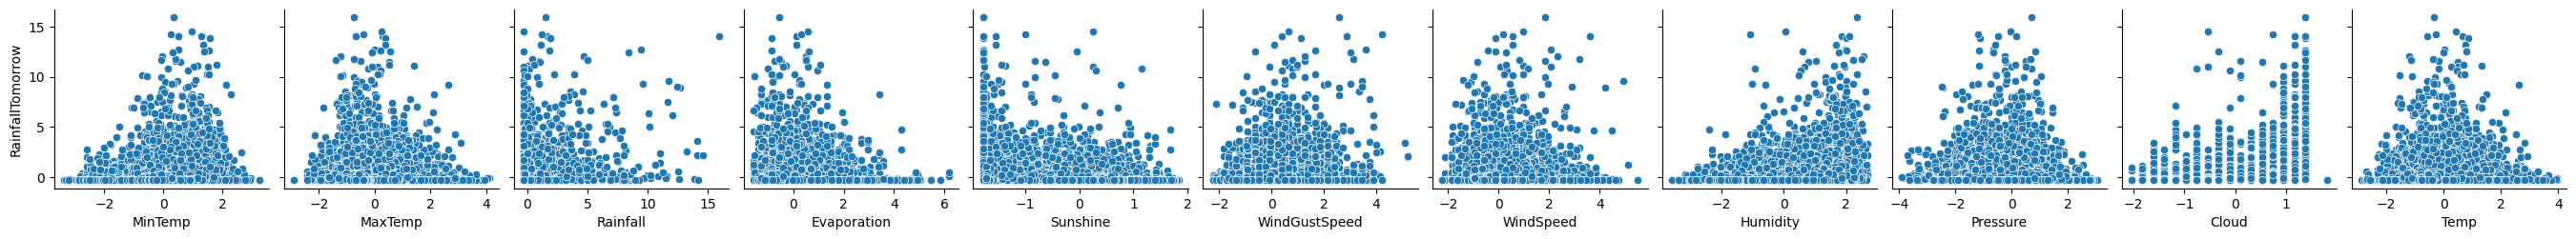

In [1158]:
sns.pairplot(data_modelo_normal,x_vars=columnas,y_vars='RainfallTomorrow')
plt.show()

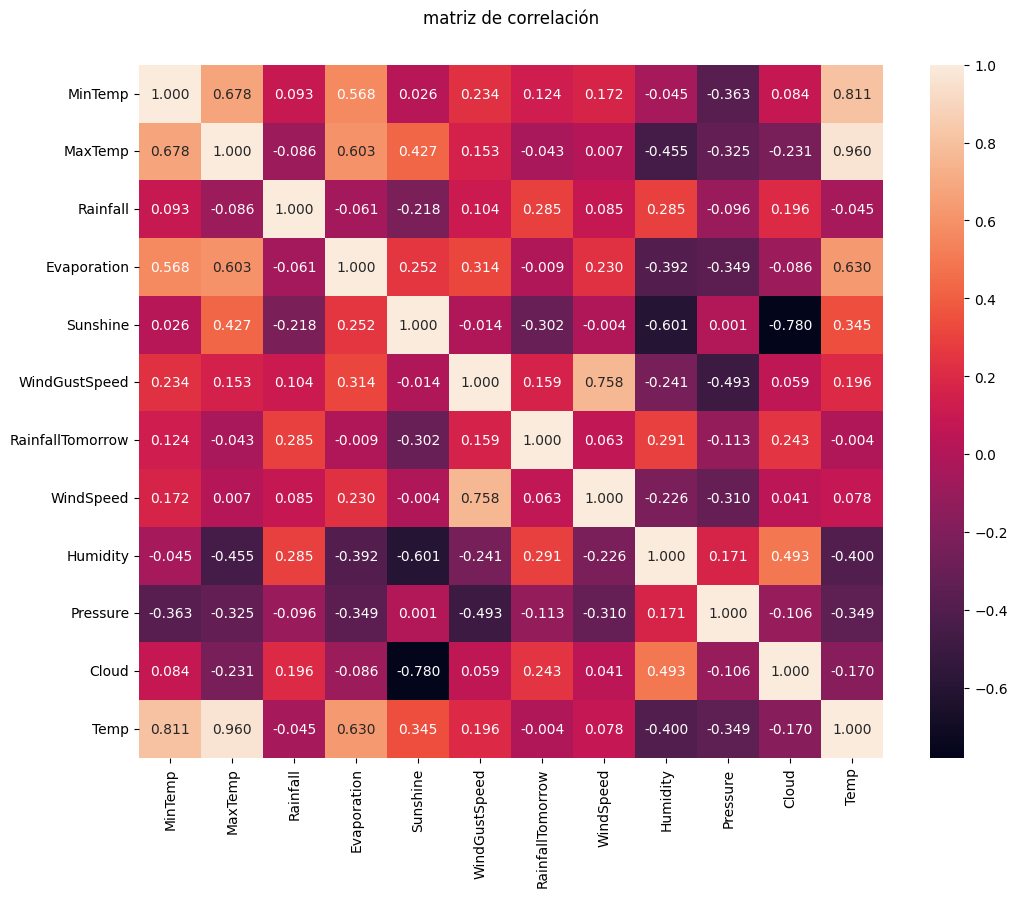

In [1159]:
plt.figure(figsize=(12, 9))

sns.heatmap(data_modelo_normal.corr(numeric_only=True), annot=True, fmt=".3f")

plt.title('matriz de correlación', pad = 30)

plt.show()

En base a la matriz de correlación optamos por sacar las columnas (1)"Evaportion", (2)"Sunshine", (3)"WindGustSpeed", (4)"WindGustDir" y (5)"WindDir9am", en base a los siguientes criterios:

 (1)tiene casi 0 correlación lineal contra "RainfallTomorrow".

 (2)tiene una una alta correlación negativa contra "Humidity".

 (3)tiene alta correlación positiva con "WindSpeed".

 (4) y (5) nos quedamos con "WindDir3pm" porque pensamos que al ser la última es la que más se acerca al día siguiente.

 De este modo resolvemos el problema de los NaN para estas columnas y simplificamos el modelo al sacarle variables.  

In [1160]:
data_modelo_normal = data_modelo_normal.drop(['Evaporation', 'Sunshine', 'WindGustSpeed', 'WindGustDir', 'WindDir9am'], axis=1)

In [1161]:
data_modelo_normal.isna().sum()

MinTemp               0
MaxTemp               0
Rainfall              3
RainfallTomorrow      3
WindSpeed             0
Humidity              0
Pressure              0
Cloud               779
Temp                  0
Location              0
Date                  0
WindDir3pm            1
RainToday             3
RainTomorrow          3
dtype: int64

Agregamos las columnas categóricas que habíamos sacado previeamente.

In [1162]:
data_modelo_normal[['Location', 'Date', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = data_modelo[['Location', 'Date', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]


Modificamos los valores de columas  WindGustDir,	WindDir9am y	WindDir3pm bajo el criterio de que si la cadena de texto empieza con N, O, S y E, que el valor del registro sea esa misma letra según corresponda. Esto es para simplificar la variable categórica que luego tendremos que pasar a dummies.

In [1163]:
data_modelo_normal

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Location,Date,WindDir3pm,RainToday,RainTomorrow,WindDir9am
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,MelbourneAirport,2009-01-01,SW,No,Yes,W
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,MelbourneAirport,2009-01-02,SSE,Yes,No,SW
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,MelbourneAirport,2009-01-03,S,No,No,E
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,MelbourneAirport,2009-01-04,SSE,No,No,NE
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,MelbourneAirport,2009-01-05,SSE,No,No,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,Sydney,2017-06-20,SSW,Yes,No,W
15982,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,Sydney,2017-06-21,SSE,No,No,SSE
15983,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,Sydney,2017-06-22,ESE,No,No,W
15984,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,Sydney,2017-06-23,N,No,No,W


In [1164]:
data_modelo_normal['WindDir9am'] = data_modelo_normal['WindDir9am'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else x)
data_modelo_normal['WindDir3pm'] = data_modelo_normal['WindDir3pm'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else x)

In [1165]:
data_modelo_normal

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Location,Date,WindDir3pm,RainToday,RainTomorrow,WindDir9am
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,MelbourneAirport,2009-01-01,S,No,Yes,W
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,MelbourneAirport,2009-01-02,S,Yes,No,S
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,MelbourneAirport,2009-01-03,S,No,No,E
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,MelbourneAirport,2009-01-04,S,No,No,N
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,MelbourneAirport,2009-01-05,S,No,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,Sydney,2017-06-20,S,Yes,No,W
15982,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,Sydney,2017-06-21,S,No,No,S
15983,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,Sydney,2017-06-22,E,No,No,W
15984,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,Sydney,2017-06-23,N,No,No,W


In [1166]:
data_modelo_normal.isna().sum()

MinTemp               0
MaxTemp               0
Rainfall              3
RainfallTomorrow      3
WindSpeed             0
Humidity              0
Pressure              0
Cloud               779
Temp                  0
Location              0
Date                  0
WindDir3pm            1
RainToday             3
RainTomorrow          3
WindDir9am            2
dtype: int64

Eliminamos todas la filas que tinen algún valor NaN siguiendo el criterio que que son muy pocas. A los valores de "Cloud" los reemplazamos por la media.

In [1167]:
data_modelo['Cloud'].fillna(data_modelo['Cloud'].mean(), inplace=True)

In [1168]:
data_modelo_normal = data_modelo_normal.dropna()
data_modelo_normal = data_modelo_normal.reset_index(drop=True)

In [1169]:
data_modelo_normal.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
RainfallTomorrow    0
WindSpeed           0
Humidity            0
Pressure            0
Cloud               0
Temp                0
Location            0
Date                0
WindDir3pm          0
RainToday           0
RainTomorrow        0
WindDir9am          0
dtype: int64

In [1170]:
data_modelo_normal

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Location,Date,WindDir3pm,RainToday,RainTomorrow,WindDir9am
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,MelbourneAirport,2009-01-01,S,No,Yes,W
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,MelbourneAirport,2009-01-02,S,Yes,No,S
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,MelbourneAirport,2009-01-03,S,No,No,E
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,MelbourneAirport,2009-01-04,S,No,No,N
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,MelbourneAirport,2009-01-05,S,No,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,Sydney,2017-06-20,S,Yes,No,W
15196,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,Sydney,2017-06-21,S,No,No,S
15197,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,Sydney,2017-06-22,E,No,No,W
15198,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,Sydney,2017-06-23,N,No,No,W


Eliminamos la columna "WindDir9am" siguiendo el criterio que nos quedamos sólo con "WindDir3pm", la última más cercana al día siguiente que intentamos predecir y posteriormente lasificar. Luego pasamos a dummies a la columana "WindDir3pm"

In [1171]:
data_modelo_normal = data_modelo_normal.drop('WindDir9am', axis=1)

In [1172]:
df_modelo = pd.get_dummies(data_modelo_normal, columns=['WindDir3pm'], prefix='WindDir')

In [1173]:
df_modelo

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Location,Date,RainToday,RainTomorrow,WindDir_E,WindDir_N,WindDir_S,WindDir_W
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,MelbourneAirport,2009-01-01,No,Yes,0,0,1,0
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,MelbourneAirport,2009-01-02,Yes,No,0,0,1,0
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,MelbourneAirport,2009-01-03,No,No,0,0,1,0
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,MelbourneAirport,2009-01-04,No,No,0,0,1,0
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,MelbourneAirport,2009-01-05,No,No,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,Sydney,2017-06-20,Yes,No,0,0,1,0
15196,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,Sydney,2017-06-21,No,No,0,0,1,0
15197,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,Sydney,2017-06-22,No,No,1,0,0,0
15198,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,Sydney,2017-06-23,No,No,0,1,0,0


A partir de la columna "Date" obtenemos la estación del año en una nueva columna que luego pasamos a dummies.

In [1174]:
def obtener_estacion(fecha):
    mes = fecha.month
    if 3 <= mes <= 5:
        return 'Primavera'
    elif 6 <= mes <= 8:
        return 'Verano'
    elif 9 <= mes <= 11:
        return 'Otoño'
    else:
        return 'Invierno'

df_modelo['Estacion'] = df_modelo['Date'].apply(obtener_estacion)


df_modelo = pd.get_dummies(df_modelo, columns=['Estacion'], prefix='Estacion')
df_modelo


,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Location,...,RainToday,RainTomorrow,WindDir_E,WindDir_N,WindDir_S,WindDir_W,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,MelbourneAirport,...,No,Yes,0,0,1,0,1,0,0,0
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,MelbourneAirport,...,Yes,No,0,0,1,0,1,0,0,0
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,MelbourneAirport,...,No,No,0,0,1,0,1,0,0,0
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,MelbourneAirport,...,No,No,0,0,1,0,1,0,0,0
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,MelbourneAirport,...,No,No,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,Sydney,...,Yes,No,0,0,1,0,0,0,0,1
15196,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,Sydney,...,No,No,0,0,1,0,0,0,0,1
15197,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,Sydney,...,No,No,1,0,0,0,0,0,0,1
15198,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,Sydney,...,No,No,0,1,0,0,0,0,0,1


Pasamos a dummies a las columnas "RainTomorrow" y "RainToday"

In [1175]:
df_modelo = pd.get_dummies(df_modelo, columns=['RainTomorrow'], prefix='RainTomorrow')
df_modelo

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Location,...,WindDir_E,WindDir_N,WindDir_S,WindDir_W,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,RainTomorrow_No,RainTomorrow_Yes
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,MelbourneAirport,...,0,0,1,0,1,0,0,0,0,1
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,MelbourneAirport,...,0,0,1,0,1,0,0,0,1,0
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,MelbourneAirport,...,0,0,1,0,1,0,0,0,1,0
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,MelbourneAirport,...,0,0,1,0,1,0,0,0,1,0
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,MelbourneAirport,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,Sydney,...,0,0,1,0,0,0,0,1,1,0
15196,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,Sydney,...,0,0,1,0,0,0,0,1,1,0
15197,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,Sydney,...,1,0,0,0,0,0,0,1,1,0
15198,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,Sydney,...,0,1,0,0,0,0,0,1,1,0


In [1176]:
df_modelo = pd.get_dummies(df_modelo, columns=['RainToday'], prefix='RainToday')
df_modelo

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Location,...,WindDir_S,WindDir_W,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,RainTomorrow_No,RainTomorrow_Yes,RainToday_No,RainToday_Yes
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,MelbourneAirport,...,1,0,1,0,0,0,0,1,1,0
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,MelbourneAirport,...,1,0,1,0,0,0,1,0,0,1
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,MelbourneAirport,...,1,0,1,0,0,0,1,0,1,0
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,MelbourneAirport,...,1,0,1,0,0,0,1,0,1,0
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,MelbourneAirport,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,Sydney,...,1,0,0,0,0,1,1,0,0,1
15196,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,Sydney,...,1,0,0,0,0,1,1,0,1,0
15197,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,Sydney,...,0,0,0,0,0,1,1,0,1,0
15198,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,Sydney,...,0,0,0,0,0,1,1,0,1,0


De las columnas generadas por dummies para las variables categóricas que convertimos a vectores one hot encoding, dropeamos una de ellas, dado que los vectores de n dimensiones, funcionan con n-1 dimensiones. También dropeamos la columna "Location" porque se nos informó en el enunciado del TP que todas las locaciones podían ser tratadas como una sola.

In [1177]:
df_modelo = df_modelo.drop(['Estacion_Invierno', 'WindDir_E', 'RainToday_No', 'RainTomorrow_No', 'Date', 'Location'], axis=1)
df_modelo

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir_N,WindDir_S,WindDir_W,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,RainTomorrow_Yes,RainToday_Yes
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,0,1,0,0,0,0,1,0
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,0,1,0,0,0,0,0,1
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,0,1,0,0,0,0,0,0
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,0,1,0,0,0,0,0,0
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,0,1,0,0,0,1,0,1
15196,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,0,1,0,0,0,1,0,0
15197,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,0,0,0,0,0,1,0,0
15198,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,1,0,0,0,0,1,0,0


Hacemos nuevamente la matriz de temperatura pero contemplando las variables categóricas que pasamos a dummies.

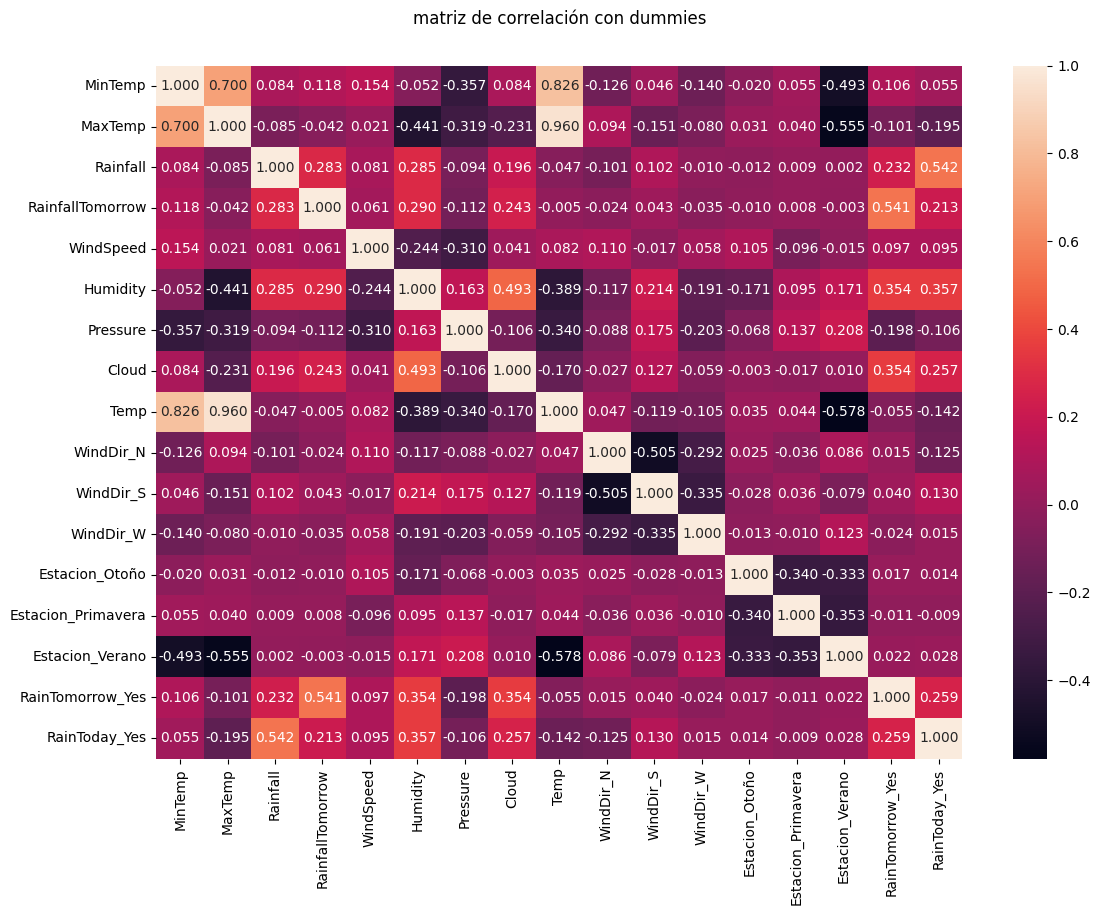

In [1178]:
plt.figure(figsize=(13, 9))

sns.heatmap(df_modelo.corr(numeric_only=True), annot=True, fmt=".3f")

plt.title('matriz de correlación con dummies', pad = 30)

plt.show()

Apreciamos que contra "RainfallTomorrow" y "RainfallTomorrow_Yes" las variables dummies de dirección del viento y estación del año casi no tienen correlación. Lo mismo sucede con la de temperatura "Temp" y la velocidad del viento "WindSpeed". Por otra parte, vemos que las variables "MaxTemp" y "MinTemp" tienen algo de correlación, pero suponemos que al combinarlas en una nueva que sea la amplitud térmica podría mejorar la correlación. En una primera instancia se nos ocurrió dropear todas las columnas dummies agregadas de estación del año y dirección del viento, y, por otra parte la de "Temp" y "WindSpeed". Además, en esta primera instancia, a"MaxTemp" y "MinTemp" la combinamos en una nueva que se llama "AmplitudTerm". Pero sucedió que al hacer estas modificaciones el modelo empeoraba las métricas, por lo que concluimos dejar para esta primera entrega el dataframe utilizado en la matriz de calor anterior.

# TRATAMIENTO DE OUTLIERS

Sabemos que los modelos de regresión lineal son sesibles a la presencia de outliers. Se nos ocurre sacar los outliers muy extremos, aquellos que se alejan de la media en más de 4 desviaciones estándar. Como hemos eliminados muy pocos registros del df, sacamos las filas que tengan algún valor ouliter extremo.

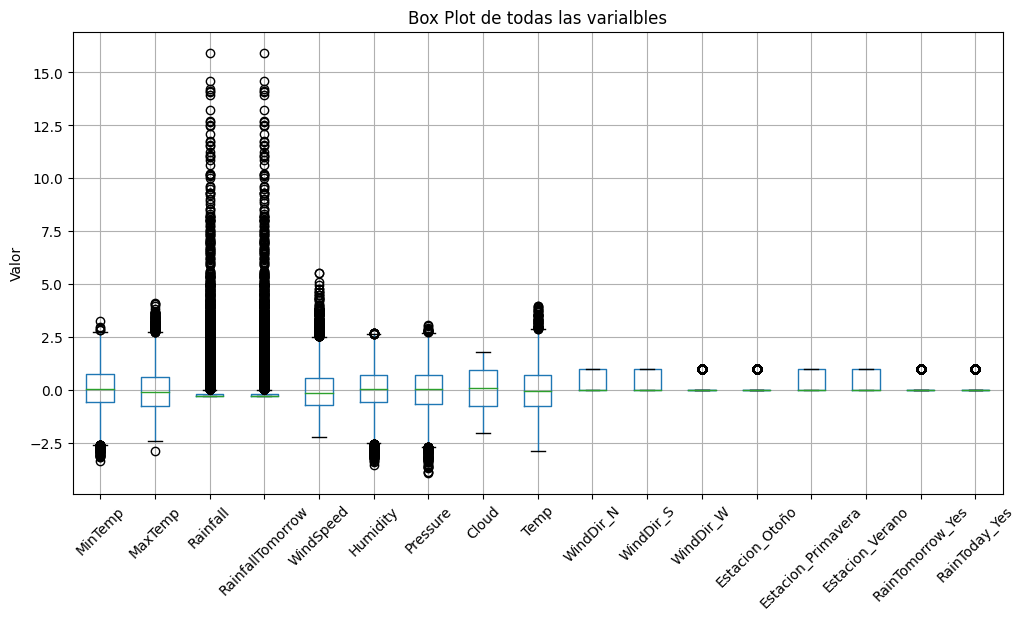

In [1179]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias
df_modelo[df_modelo.columns].boxplot()
plt.title('Box Plot de todas las varialbles')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

In [1180]:
# Crear un DataFrame vacío con las mismas columnas e índices que el original
outlier_df = pd.DataFrame(index=df_modelo.index, columns=df_modelo.columns)

# Itera a través de las columnas numéricas
for columna in df_modelo.columns:
    media = df_modelo[columna].mean()
    std_dev = df_modelo[columna].std()

    # Identifica los valores que están a más de 3.0 desviaciones estándar de la media
    outliers_columna = df_modelo[abs(df_modelo[columna] - media) > 4* std_dev]

    # Asigna los valores extremos al nuevo DataFrame
    outlier_df[columna].loc[outliers_columna.index] = df_modelo[columna].loc[outliers_columna.index]

# Muestra el nuevo DataFrame con los valores extremos y NaN en los otros lugares
outlier_df.describe()

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir_N,WindDir_S,WindDir_W,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,RainTomorrow_Yes,RainToday_Yes
count,0,4.000000,190.000000,191.000000,20.000000,0,0,0,1.000000,0,0,0,0,0,0,0,0
unique,0,3.000000,131.000000,131.000000,9.000000,0,0,0,1.000000,0,0,0,0,0,0,0,0
top,NaN,4.041456,4.177921,4.178474,4.350941,NaN,NaN,NaN,3.953017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2.000000,5.000000,5.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1181]:
outlier_df.tail()

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir_N,WindDir_S,WindDir_W,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,RainTomorrow_Yes,RainToday_Yes
15195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1182]:
# Calcula el número de valores no nulos en cada columna
len_por_columna = outlier_df.count()

# Muestra el resultado
print(len_por_columna)

MinTemp                 0
MaxTemp                 4
Rainfall              190
RainfallTomorrow      191
WindSpeed              20
Humidity                0
Pressure                0
Cloud                   0
Temp                    1
WindDir_N               0
WindDir_S               0
WindDir_W               0
Estacion_Otoño          0
Estacion_Primavera      0
Estacion_Verano         0
RainTomorrow_Yes        0
RainToday_Yes           0
dtype: int64


In [1183]:
indices_con_valores = []

# Itera a través de las filas del DataFrame
for indx , row in outlier_df.iterrows():
    if row.notna().any():
        indices_con_valores.append(indx)

# La lista 'indices_con_valores' ahora contiene los índices de las filas que cumplen la condición
print(indices_con_valores)
print(len(indices_con_valores))

[37, 226, 253, 272, 324, 325, 429, 430, 667, 668, 699, 700, 764, 765, 970, 971, 1029, 1030, 1451, 1494, 1522, 1523, 1592, 2007, 2055, 2056, 2460, 2461, 2742, 2749, 2830, 2831, 2931, 2932, 3172, 3173, 3220, 3229, 3418, 3445, 3464, 3516, 3517, 3598, 3599, 3621, 3622, 3859, 3860, 3956, 3957, 3958, 3959, 4162, 4163, 4221, 4222, 4223, 4236, 4237, 4250, 4251, 4252, 4253, 4404, 4405, 4643, 4686, 4714, 4715, 4716, 4717, 4784, 4831, 4832, 5199, 5247, 5248, 5249, 6054, 6055, 6196, 6197, 6601, 6602, 6616, 6617, 6863, 6864, 6968, 6969, 7060, 7061, 7106, 7107, 7110, 7111, 7172, 7173, 7174, 7175, 7434, 7435, 7512, 7513, 7515, 7516, 7729, 7730, 7800, 7801, 7974, 7975, 7995, 7996, 8044, 8232, 8233, 8255, 8256, 8315, 8316, 8591, 8592, 8656, 8657, 8892, 8893, 8938, 8939, 8951, 8952, 9129, 9146, 9147, 9250, 9251, 9351, 9352, 9518, 9519, 9521, 9522, 9656, 9657, 9698, 9699, 9748, 9749, 9750, 9751, 9752, 9874, 9875, 9893, 9894, 9938, 9939, 9946, 9947, 9963, 9964, 9980, 9981, 10022, 10023, 10075, 10076, 1007

In [1184]:
# Borramos las filas correspondientes en el DataFrame df_std
df_modelo = df_modelo.drop(indices_con_valores).reset_index(drop=True)

In [1185]:
df_modelo

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir_N,WindDir_S,WindDir_W,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,RainTomorrow_Yes,RainToday_Yes
0,-0.066529,-0.306749,-0.311588,-0.148198,2.197094,-0.964480,-1.577758,0.951359,-0.161267,0,1,0,0,0,0,1,0
1,-0.650858,-0.651324,-0.148334,-0.311469,1.091064,-0.930646,0.201151,0.737942,-0.683570,0,1,0,0,0,0,0,1
2,-0.908650,-0.109849,-0.311588,-0.311469,-0.364239,-1.167482,0.276996,-0.329142,-0.252899,0,1,0,0,0,0,0,0
3,-0.599299,1.219225,-0.311588,-0.311469,-0.946360,-1.032147,-0.371133,-0.115725,0.773381,0,1,0,0,0,0,0,0
4,-0.324321,1.186408,-0.311588,-0.311469,-0.538875,-1.302817,-0.839993,-0.329142,0.984135,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14825,-0.049343,-0.290341,0.287013,-0.311469,-0.597087,0.930206,1.345721,-0.542559,-0.381184,0,1,0,0,0,1,0,1
14826,-0.513368,-0.355974,-0.311588,-0.311469,0.217882,0.152031,1.159556,-1.182810,-0.674407,0,1,0,0,0,1,0,0
14827,-0.393065,-0.421607,-0.311588,-0.311469,-0.655299,0.355033,1.290561,-1.182810,-0.555285,0,0,0,0,0,1,0,0
14828,-0.375879,-0.667732,-0.311588,-0.311469,-0.597087,0.693370,0.097726,0.524525,-0.756876,1,0,0,0,0,1,0,0


# BALANCEO DEL DATASET

Observamos que tan desbalanciado está el df repecto de los días que llovieron y los que no. Como puede apreciarse está desbalanciado.

In [1186]:
df_modelo.groupby('RainTomorrow_Yes').describe()

MinTemp                                                    \
                    count      mean       std       min       25%       50%   
RainTomorrow_Yes                                                              
0                 11465.0 -0.016303  0.986378 -3.366267 -0.650858 -0.032157   
1                  3365.0  0.195666  0.922452 -2.833497 -0.461810  0.174077   

                                      MaxTemp            ... Estacion_Verano  \
                       75%       max    count      mean  ...             75%   
RainTomorrow_Yes                                         ...                   
0                 0.689661  3.250396  11465.0  0.042110  ...             1.0   
1                 0.930267  2.958231   3365.0 -0.192198  ...             1.0   

                      RainToday_Yes                                          \
                  max         count      mean       std  min  25%  50%  75%   
RainTomorrow_Yes                                                              
0                 1.0       11465.0  0.174357  0.379433  0.0  0.0  0.0  0.0   
1                 1.0        3365.0  0.407132  0.491373  0.0  0.0  0.0  1.0   

                       
                  max  
RainTomorrow_Yes       
0                 1.0  
1                 1.0  

[2 rows x 128 columns]

In [1187]:
# Contar las clases en la columna 'RainTomorrow_Yes'
print("Conteo de clases antes de aplicar SMOTE:")
print(df_modelo['RainTomorrow_Yes'].value_counts())

Conteo de clases antes de aplicar SMOTE:
0    11465
1     3365
Name: RainTomorrow_Yes, dtype: int64


In [1188]:
# Separar las características (X) de la variable objetivo (y)
X = df_modelo.drop('RainTomorrow_Yes', axis=1)
y = df_modelo['RainTomorrow_Yes']


In [1189]:
# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [1190]:
# Crear un nuevo DataFrame con las muestras sintéticas
df_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
df_resampled['RainTomorrow_Yes'] = y_resampled

In [1191]:
# Contar las clases en la columna 'RainTomorrow_Yes' del DataFrame después de aplicar SMOTE
print("Conteo de clases después de aplicar SMOTE:")
print(df_resampled['RainTomorrow_Yes'].value_counts())

Conteo de clases después de aplicar SMOTE:
1    11465
0    11465
Name: RainTomorrow_Yes, dtype: int64


In [1192]:
df_resampled.describe()

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir_N,WindDir_S,WindDir_W,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,RainToday_Yes,RainTomorrow_Yes
count,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000
mean,0.098365,-0.075220,-0.005414,0.166441,0.077612,0.209572,-0.113481,0.203912,-0.034736,0.305451,0.365983,0.150109,0.240733,0.248365,0.257915,0.276232,0.500000
std,0.950913,0.978429,0.678222,0.778135,0.996924,1.009525,1.013461,0.948576,0.980542,0.460608,0.481715,0.357186,0.427538,0.432074,0.437497,0.447143,0.500011
min,-3.366267,-2.899264,-0.311588,-0.311469,-2.227026,-3.569673,-3.908267,-2.036477,-2.873579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.547032,-0.831815,-0.311588,-0.311469,-0.655299,-0.456975,-0.805518,-0.329142,-0.799572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.065201,-0.159074,-0.311588,-0.161804,-0.073178,0.247296,-0.104536,0.524525,-0.081131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.809964,0.580371,-0.066706,0.293745,0.683579,0.930206,0.586914,0.951359,0.672586,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.250396,3.828148,4.069084,4.069627,4.001669,2.689557,3.041890,1.805027,3.852221,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODELO DE REGRESIÓN LIENAL Y MÉTRICAS

In [1193]:
# Obtenemos las variables independientes (X) y la variable dependiente (y)
X = df_resampled[['Humidity', 'Pressure','Cloud','MinTemp','MaxTemp','Rainfall', 'WindSpeed', 'Temp', 'WindDir_N','WindDir_S','WindDir_W', 'Estacion_Otoño', 'Estacion_Primavera','Estacion_Verano', 'RainToday_Yes']]
Y = df_resampled['RainfallTomorrow']

In [1194]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

regressor = LinearRegression()

# Entrenamos al modelo con los datos de entrenamiento
regressor.fit(X_train, Y_train)

# Realizamos las predicciones con los datos de prueba
Y_pred = regressor.predict(X_test)

In [1195]:
#guardamos los conjuntos de entrenamiento y prueba
y_train = Y_train
y_test = Y_test
x_train = X_train
x_test = X_test

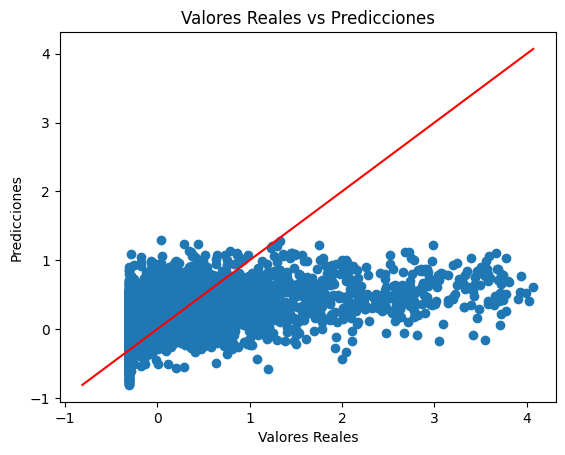

In [1196]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Dibujamos la línea de perfección
diagonal = np.linspace(min(Y_test.min(), Y_pred.min()), max(Y_test.max(), Y_pred.max()))
plt.plot(diagonal, diagonal, '-r')
plt.show()

El gráfico muestra los valores reales de la variable dependiente (conjunto de prueba, puntos azules) contra los predichos por el modelo (conjunto de entrenamiento, linea roja). Si los puntos copiaran la pendiente de la recta, nuestro modelo sería perfecto (predicción = realidad). Se puede apreciar que éste no es el caso dado que muchos puntos se alejan de la recta.

Uno de los modos de evaluar el error es mediante un gráfico representado por los residuos contra las predicciones del modelo.

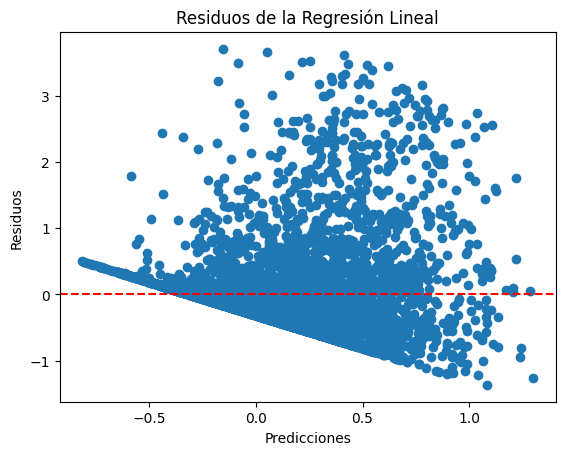

In [1197]:
# Calcular los residuos
residuos = Y_test - Y_pred

# Graficar los residuos
plt.scatter(Y_pred, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos de la Regresión Lineal')
plt.axhline(y=0, color='red', linestyle='--')  # Agregar línea horizontal en y=0
plt.show()

El gráfico muestra un sesgo a la sobrestimación de la variable dependiente.  

In [1198]:

# Añadimos una columna de unos a la matriz de variables independientes para incluir el término constante
X_train = sm.add_constant(X_train)

# Creamos una instancia del modelo de regresión
model = sm.OLS(Y_train, X_train)
# Ajustamos el modelo a los datos de entrenamiento
results = model.fit()
# Calculamos y mostramos los coeficientes de la regresión
print('Coeficientes:', regressor.coef_)
print("")
print('Intercepto:', round(regressor.intercept_, 4))
print("")


print("#### LAS MÉTRICAS SEGÚN EL MÉTODO DE REGRESIÓN LIENEAL SON:")
print('')
# Calculamos y mostramos el Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {round(mse, 4)}")
print("")

# Calculamos y mostramos el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {round(rmse, 4)}")
print("")

# Calculamos y mostramos el Mean Absolute Error (MAE) con 4 decimales
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error (MAE): {round(mae, 4)}")
print("")

# Calculamos y mostramos el coeficiente de determinación (R²) con 4 decimales
r2 = regressor.score(X_test, Y_test)
print('R²:', round(r2, 4))
print("")



Coeficientes: [ 0.24211841 -0.07867418  0.12921044 -0.0730804  -0.12224567  0.12794317
  0.06181624  0.28209097 -0.11745504 -0.14407001 -0.17554033  0.0076858
 -0.0490142   0.00265701 -0.05804845]

Intercepto: 0.2186

#### LAS MÉTRICAS SEGÚN EL MÉTODO DE REGRESIÓN LIENEAL SON:

Mean Squared Error (MSE): 0.4895

Root Mean Squared Error (RMSE): 0.6996

Mean Absolute Error (MAE): 0.4578

R²: 0.2255



R²: establece que el modelo explica el 22,55% de la variación total de la variable dependiente.

# MÉTODO DEL GRADIENTE DESCENDIENTE

In [1199]:
#Reiniciamos el conjuto de datos original
Y_train = y_train
Y_test = y_test
X_train = x_train
X_test = x_test

In [1200]:
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

In [1201]:
def metricas_gradient_descent(X_train, Y_train, X_test, Y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        Y_train = nx1
        X_test = pxm
        Y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = Y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = Y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    print("#### LAS MÉTRICAS SEGÚN EL MÉTODO DEL DESCENSO DEL GRADIENTE SON:")
    print('')

    # Calculamos las métricas usando los valores finales de la última época
    final_prediction_train = np.matmul(X_train, W)
    final_prediction_test = np.matmul(X_test, W)

    mse = mean_squared_error(Y_test, final_prediction_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, final_prediction_test)
    r2 = r2_score(Y_test, final_prediction_test)

    # Imprimimos las métricas
    print(f"Mean Squared Error (MSE): {round(mse, 4)}")
    print('')
    print(f"Root Mean Squared Error (RMSE): {round(rmse, 4)}")
    print('')
    print(f"Mean Absolute Error (MAE): {round(mae, 4)}")
    print('')
    print(f"R²: {round(r2, 4)}")
    print('')

In [1202]:
metricas_gradient_descent(X_train, Y_train, X_test, Y_test, lr=0.01, epochs=2000)

#### LAS MÉTRICAS SEGÚN EL MÉTODO DEL DESCENSO DEL GRADIENTE SON:

Mean Squared Error (MSE): 0.4927

Root Mean Squared Error (RMSE): 0.7019

Mean Absolute Error (MAE): 0.4588

R²: 0.2205



# REGULARIZACIÓN

In [1203]:
#Reiniciamos el conjunto de datos original
Y_train = y_train
Y_test = y_test
X_train = x_train
X_test = x_test

In [1210]:
# Crear un modelo de regresión lineal con regularización Elastic Net
modelo_elastic_net = ElasticNet(alpha=0.00001, l1_ratio=0.005)

# El valor de alpha controla la fuerza de la regularización global (combinación de L1 y L2).
# l1_ratio controla la proporción entre la regularización L1 y L2. Un valor de 0.5 equilibra ambas regularizaciones.

# Ajustar el modelo a los datos de entrenamiento
modelo_elastic_net.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
y_pred_elastic_net = modelo_elastic_net.predict(X_test)

# Evaluar el rendimiento del modelo Elastic Net
mse_elastic_net = mean_squared_error(Y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(Y_test, y_pred_elastic_net)

print(f"Mean Squared Error (MSE): {round(mse_elastic_net, 4)}")
print(f"R²: {round(r2_elastic_net, 4)}")

Mean Squared Error (MSE): 0.4895
R²: 0.2255


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.405e+03, tolerance: 1.098e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
